<a href="https://colab.research.google.com/github/ziyaatayazici/cancer_classification/blob/master/Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Keras/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


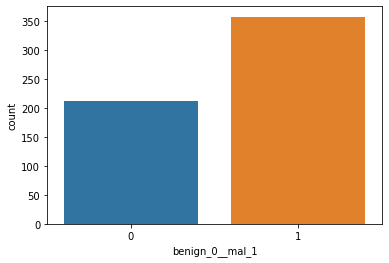

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

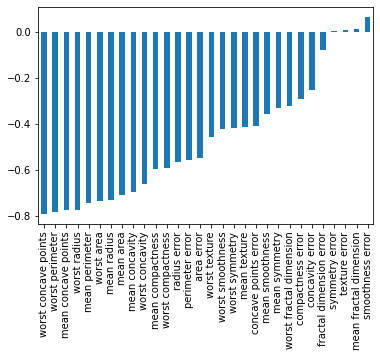

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

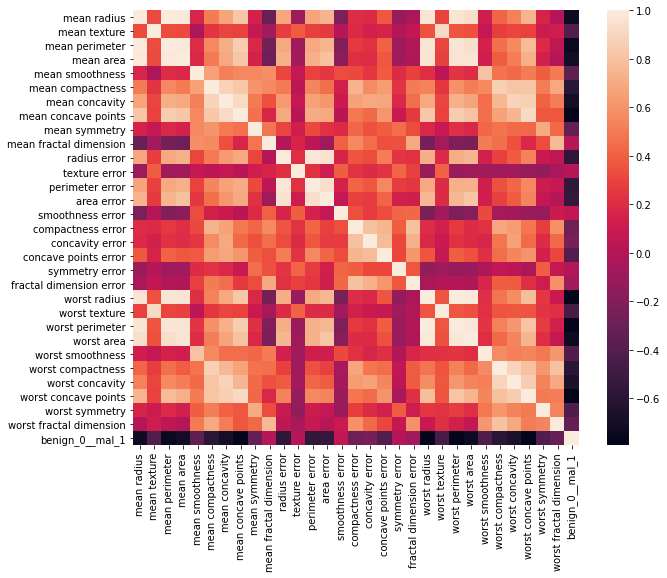

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [0]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
X_train.shape

(426, 30)

In [0]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION - OUTPUT WILL BE 1 OR 0
model.add(Dense(1, activation='sigmoid')) #If the output would have been a random number, we'd not need to add an activation function.

model.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6771 - val_loss: 0.6598
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6264 - val_loss: 0.6180
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5855 - val_loss: 0.5734
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5433 - val_loss: 0.5275
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5031 - val_loss: 0.4804
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4500 - val_loss: 0.4288
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4010 - val_loss: 0.3805
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3591 - val_loss: 0.3388
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3301 - val_loss: 0.3020
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2978 - val_loss: 0.2728
Epoch 11

In [0]:
losses = pd.DataFrame(model.history.history)

In [21]:
losses.head()

,loss,val_loss
0,0.677071,0.659769
1,0.626398,0.617963
2,0.585505,0.573413
3,0.543343,0.527482
4,0.503098,0.480422


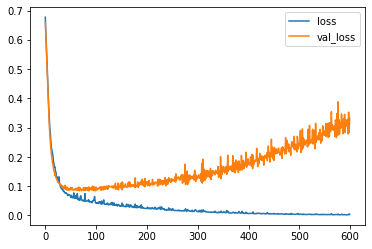

In [22]:
losses.plot() #OVERFITTING

In [0]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION - OUTPUT WILL BE 1 OR 0
model.add(Dense(1, activation='sigmoid')) #If the output would have been a random number, we'd not need to add an activation function.

model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [26]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6759 - val_loss: 0.6590
Epoch 2/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6392 - val_loss: 0.6196
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5957 - val_loss: 0.5696
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5416 - val_loss: 0.5068
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4739 - val_loss: 0.4410
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4134 - val_loss: 0.3775
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3576 - val_loss: 0.3254
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3206 - val_loss: 0.2815
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2805 - val_loss: 0.2494
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2563 - val_loss: 0.2222
Epoch 11

In [0]:
model_loss = pd.DataFrame(model.history.history)

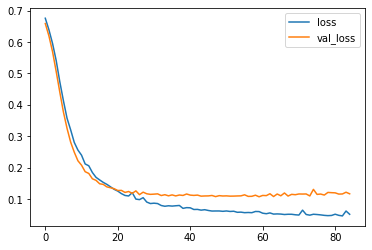

In [28]:
model_loss.plot()

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION - OUTPUT WILL BE 1 OR 0
model.add(Dense(1, activation='sigmoid')) #If the output would have been a random number, we'd not need to add an activation function.

model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7022 - val_loss: 0.6592
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6777 - val_loss: 0.6468
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6551 - val_loss: 0.6256
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6544 - val_loss: 0.6069
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6105 - val_loss: 0.5862
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6039 - val_loss: 0.5563
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5732 - val_loss: 0.5229
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5497 - val_loss: 0.4863
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5267 - val_loss: 0.4565
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4925 - val_loss: 0.4271
Epoch 11/

In [0]:
model_loss = pd.DataFrame(model.history.history)

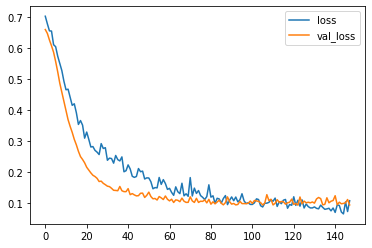

In [33]:
model_loss.plot() #BEST!!!

In [34]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [37]:
print(confusion_matrix(y_test, predictions)) #YANLIS POZITIF YANLIS NEGATIF VB.

[[53  2]
 [ 1 87]]
